In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import statsmodels.api as sm

In [43]:
personas = {
  "none": 1734395183,
  "young_person": 1738885303,
  "older_person": 1738885546,
  "man": 1738885722,
  "woman": 1738885914,
  "competitive_person": 1738886203,
  "introvert": 1738886397,
  "extrovert": 1738886580
}


In [44]:
# Load Datasets
personas_df = []
for persona,_id in personas.items():
  pp_df = pd.read_csv(f"dist/pp_df_{_id}.csv")
  ps_df = pd.read_csv(f"dist/ps_df_{_id}.csv")
  pp_df['game'] = "play_for_pair"
  ps_df['game'] = "play_for_self"
  pp_df['persona'] = persona.replace('person', '').replace('_', ' ').strip().title()
  ps_df['persona'] = persona.replace('person', '').replace('_', ' ').strip().title()
  personas_df.append(pp_df)
  personas_df.append(ps_df)
personas_df = pd.concat(personas_df)
personas_df

,player,period,stag,payoff,game,persona
0,Team1,0,True,9,play_for_pair,None
1,Team2,0,True,9,play_for_pair,None
2,Team1,1,True,9,play_for_pair,None
3,Team2,1,True,9,play_for_pair,None
4,Team1,2,True,9,play_for_pair,None
...,...,...,...,...,...,...
1495,Player2,12,True,9,play_for_self,Extrovert
1496,Player1,13,True,9,play_for_self,Extrovert
1497,Player2,13,True,9,play_for_self,Extrovert
1498,Player1,14,True,9,play_for_self,Extrovert


In [45]:
# For each game and persona get the mean of stag
mean_stag = personas_df.groupby(['game','persona']).agg({'stag':'mean'}).reset_index()
humans = pd.DataFrame([
    {'game': 'play_for_pair', 'persona': 'Charness', 'stag': .439},
    {'game': 'play_for_self', 'persona': 'Chaness', 'stag': .612},
    ])
mean_stag = pd.concat([mean_stag, humans]).reset_index(drop=True)
mean_stag

,game,persona,stag
0,play_for_pair,Competitive,0.867333
1,play_for_pair,Extrovert,0.906000
2,play_for_pair,Introvert,0.017333
3,play_for_pair,Man,0.596000
4,play_for_pair,None,0.760267
5,play_for_pair,Older,0.320000
6,play_for_pair,Woman,0.220000
7,play_for_pair,Young,0.728667
8,play_for_self,Competitive,0.234667
9,play_for_self,Extrovert,1.000000


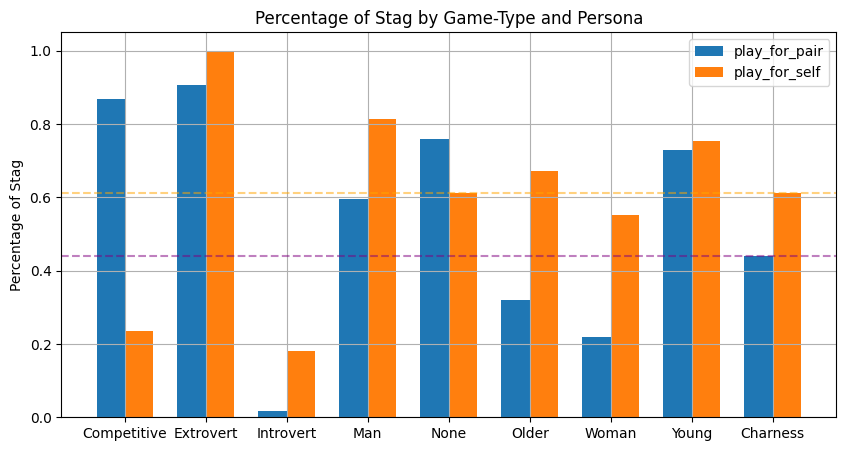

In [46]:
pp_mean = mean_stag[mean_stag['game']=='play_for_pair']
ps_mean = mean_stag[mean_stag['game']=='play_for_self']

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
width = 0.35
x = np.arange(len(pp_mean))
pp_bars = ax.bar(x - width/2, pp_mean['stag'], width, label='play_for_pair')
ps_bars = ax.bar(x + width/2, ps_mean['stag'], width, label='play_for_self')

# Add dotted horizontal line at Charness
ax.axhline(y=.439, color='purple', linestyle='--', alpha=0.5)
ax.axhline(y=.612, color='orange', linestyle='--', alpha=.5)

ax.set_ylabel('Percentage of Stag')
ax.set_title('Percentage of Stag by Game-Type and Persona')
ax.set_xticks(x)
ax.set_xticklabels(pp_mean['persona'])
ax.legend()
plt.grid()

plt.show()
